# Reducing Dimension to 1


In [2]:
import numpy as np
import pandas as pd 
def meanf(y):
    return sum(y)/len(y)
def stdf(y):
    return pow(sum(y - meanf(y))/len(y),0.5)

def pca(X):
    X_original = np.array(X,copy=True)
    for i in range(len(X)):
        X[i] = X[i] - meanf(X[i])
    
    Covariance_Mat = np.dot(X,X.T)/X.shape[1]
    eigenval,eigenvec = np.linalg.eig(Covariance_Mat)
    bestEigen = np.array(eigenvec[:,0])
    X = np.dot(bestEigen,X_original)

    return X

#### Test data

In [3]:
test = pd.read_csv('iris_test.csv').iloc[:,1:]
xtest = pca(np.array(test.iloc[:,:4]).T)
ytest = test.iloc[:,-1]
test = pd.DataFrame(np.array([xtest,ytest]).T,columns=['PC','class'])

#### Train data

In [4]:
train = pd.read_csv('iris_train.csv').iloc[:,1:]
xtrain = pca(np.array(train.iloc[:,:4]).T)
ytrain = train.iloc[:,-1]
train = pd.DataFrame(np.array([xtrain,ytrain]).T,columns=['PC','class'])

# Bayes on 1d Data

In [5]:
##Grouping the data with respect to each class
classes = train.groupby(['class'])
c1 = classes.get_group('Iris-setosa')
c2 = classes.get_group('Iris-virginica')
c3 = classes.get_group('Iris-versicolor')

In [6]:
import math

## Defining the function for the likelihood of a particular class ci
def prob_ci_given_xtest_1d(xt_p,ci):
    data = ci.iloc[:,0]

    mean = sum(data)/len(data)
    std = pow((sum([(data.iloc[i] - mean)**2 for i in range(len(data))])/len(data)),0.5)

    power_term = -1/2 * pow((xt_p - mean)/std,2)

    gaussian_prob = (pow(math.e,power_term))/std

    return gaussian_prob


In [7]:
ypred = []
d = {'Iris-setosa':c1,'Iris-virginica':c2,'Iris-versicolor':c3}
Class_prob = (train['class'].value_counts()/len(train['class']))  ## ek class ki probability hogi train me us class ka value count divide by us class ki length
for i in xtest:
    max_prob = 0
    class_choosen = 0
    for j in d.keys():
        prob = prob_ci_given_xtest_1d(i,d[j]) * (Class_prob[j])
        if( prob > max_prob):
            max_prob = prob
            class_choosen = j
    ypred.append(class_choosen)   ## choosing the class with max. probablity

ypred = np.array(ypred)
Class_prob

class
Iris-versicolor    0.341667
Iris-setosa        0.333333
Iris-virginica     0.325000
Name: count, dtype: float64

In [8]:
accuracy_table = pd.DataFrame(np.array([ypred,ytest]).T, columns=['predicted','actual'])
wrong_count = 0

for i in range(len(ytest)): wrong_count += (ypred[i] != ytest[i])  ##finding the wrong counts

acc2 = round((len(ypred) - wrong_count)/len(ypred) * 100,2)

print(f"Accuracy of Bayes Classifier = {acc2}%")
accuracy_table

Accuracy of Bayes Classifier = 96.67%


,predicted,actual
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


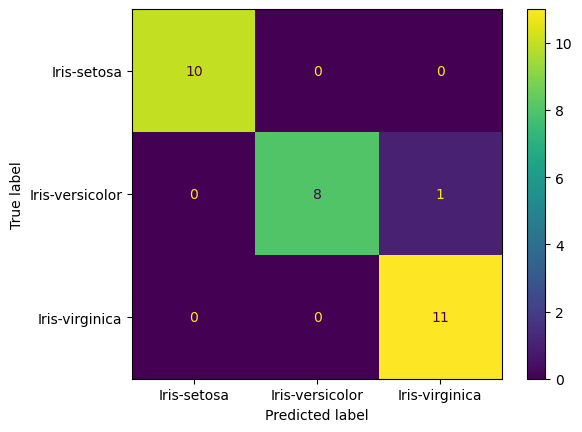

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,ypred)
ConfusionMatrixDisplay(CM,display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']).plot()

# Bayes On 4d Data

### Test Data

In [10]:
test_data = pd.read_csv('iris_test.csv').iloc[:,1:]
x_test = test_data.iloc[:,:4]
y_test = test_data.iloc[:,-1]

### Train Data

In [11]:
train_data = pd.read_csv('iris_train.csv').iloc[:,1:]
x_train = train_data.iloc[:,:4]
y_train = train_data.iloc[:,-1]

### Grouping by class

In [12]:
classes = train_data.groupby(['Species'])
c1_4d = classes.get_group('Iris-setosa')
c2_4d = classes.get_group('Iris-virginica')
c3_4d = classes.get_group('Iris-versicolor')

### Function for finding likelihood for a class ci

In [13]:
import math

def prob_ci_given_xtest_4d(xt_p,ci):
    data = ci.iloc[:,:4]
    mean = np.array([sum(data.iloc[:,i])/data.shape[0] for i in range(4)]) ## finding mean of class ci , 4 length array of mean of each attribute
    xt_p = (xt_p - mean).reshape(1,4)  ## making 1*4 matrix

    data = ci.iloc[:,:4] - ci.iloc[:,:4].mean()


    Covariance_Mat = np.dot(data.T,data)/data.shape[0]
    # Covariance_Mat = np.cov([data.iloc[:,0],data.iloc[:,1],data.iloc[:,2],data.iloc[:,3]])
    
    Covariance_Mat_inv = np.linalg.inv(Covariance_Mat)

    power_term = -1/2 * ((np.dot( np.dot(xt_p,Covariance_Mat_inv), xt_p.T))[0][0])
    gaussian_prob = (pow(math.e,power_term))/pow(np.linalg.det(Covariance_Mat),0.5)

    return gaussian_prob

In [14]:
ypred_4d = []
d = {'Iris-setosa':c1_4d,'Iris-virginica':c2_4d,'Iris-versicolor':c3_4d}
Class_prob = (train_data['Species'].value_counts()/len(train_data['Species'])) ## finding probability of each class

for i in range(x_test.shape[0]):
    max_prob = 0
    class_choosen = 0
    for j in d.keys():
        prob = prob_ci_given_xtest_4d(np.array(x_test.iloc[i]),d[j]) * (Class_prob[j])
        if( prob > max_prob):
            max_prob = prob
            class_choosen = j
    ypred_4d.append(class_choosen)

ypred_4d = np.array(ypred_4d)
Class_prob

Species
Iris-versicolor    0.341667
Iris-setosa        0.333333
Iris-virginica     0.325000
Name: count, dtype: float64

In [15]:
accuracy_table_4d = pd.DataFrame(np.array([ypred_4d,y_test]).T, columns=['predicted','actual'])
wrong_count = 0
for i in range(len(y_test)): wrong_count += (ypred_4d[i] != y_test[i])

acc1 = round((len(ypred_4d) - wrong_count)/len(ypred_4d) * 100,2)

print(f"Accuracy of Bayes Classifier = {acc1}%")
accuracy_table_4d

Accuracy of Bayes Classifier = 96.67%


,predicted,actual
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-virginica,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


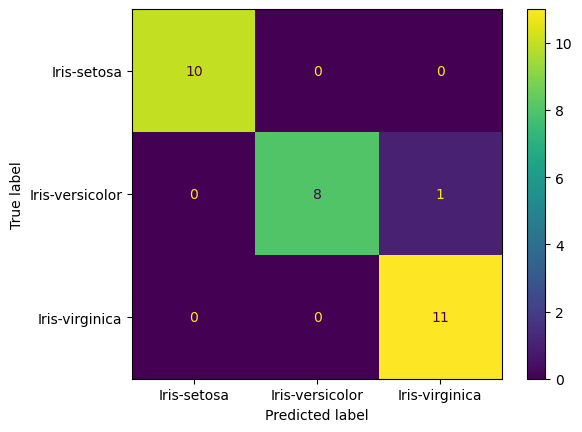

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(y_test,ypred_4d)
ConfusionMatrixDisplay(CM,display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']).plot()

In [17]:
print(f"Accuracy difference => Original data model = {acc1}%, Reduced Data = {acc2}%\nDifference = {abs(round(acc1 - acc2,2))}%")

Accuracy difference => Original data model = 96.67%, Reduced Data = 96.67%
Difference = 0.0%
